In [1]:
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline





In [2]:
import nbodykit.lab as nb
import readgadget
import MAS_library as MASL
from tqdm import tqdm
from nbodykit.source.catalog.file import BigFileCatalog
import numpy as np



In [3]:
test_LH_id = 3


In [5]:
ptypes       = [1]
grids         = [128]
BoxSize = 1000.0 #Mpc/h ; size of box
# snap_num_array = [4, 3]
snapnum = 3
snap_dir_base = '/mnt/home/fvillaescusa/ceph/Quijote/Halos/Rockstar/latin_hypercube_HR'
snapdir = snap_dir_base + '/' + str(test_LH_id)  #folder hosting the catalogue
rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
    lines = f.readlines()
header = lines[0].split()
# get the properties of the halos
pos_h_truth_orig = rockstar[:,header.index('X'):header.index('Z')+1]
index_M = header.index('M200c')                    
mass_truth_orig = rockstar[:,index_M]  #Halo masses in Msun/h
lgmass_truth_orig = np.log10(mass_truth_orig)

vel_h_truth_orig = rockstar[:,header.index('VX'):header.index('VZ')+1]

indsel_truth = np.where(lgmass_truth_orig>13)[0]

pos_h_truth_orig = pos_h_truth_orig[indsel_truth]
vel_h_truth_orig = vel_h_truth_orig[indsel_truth]
lgmass_truth_orig = lgmass_truth_orig[indsel_truth]


/tmp/ipykernel_322769/1197252509.py:16: RuntimeWarning: divide by zero encountered in log10
  lgmass_truth_orig = np.log10(mass_truth_orig)


In [6]:
root_in = '/mnt/ceph/users/cmodi/fastpm-shivam/LH_HR/'
# ji = 3
fname = '%s/%d' % (root_in, test_LH_id) + '/fastpm_B2_0.6667'

df = nb.BigFileCatalog(fname, dataset='1')        
ppos = np.array(df['Position'], dtype=np.float64)                
pvel = np.array(df['Velocity'], dtype=np.float64)                



/mnt/home/spandey/miniconda3/envs/nbodykit/lib/python3.8/site-packages/bigfile/__init__.py:358: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return pyxbigfile.Dataset.__init__(self, file, dtype=dtype, size=size)


In [7]:
# import torch
from scipy.interpolate import RegularGridInterpolator

MAS = 'CIC'
# gridv = 256
gridv = 384
# gridv = 512

xall = (np.linspace(0, 1000, gridv + 1))
xarray = 0.5 * (xall[1:] + xall[:-1])
yarray = np.copy(xarray)
zarray = np.copy(xarray)

mesh_rhov = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos.astype(np.float32), mesh_rhov, BoxSize, MAS)

mesh_momx = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos.astype(np.float32), mesh_momx, BoxSize, MAS, W=pvel[:,0].astype(np.float32))
mesh_velx = mesh_momx/mesh_rhov
interpvx = RegularGridInterpolator((xarray, yarray, zarray), mesh_velx, bounds_error=False)
velx_query_interp = interpvx(np.array(pos_h_truth_orig))


mesh_momy = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos.astype(np.float32), mesh_momy, BoxSize, MAS, W=pvel[:,1].astype(np.float32))
mesh_vely = mesh_momy/mesh_rhov
interpvy = RegularGridInterpolator((xarray, yarray, zarray), mesh_vely, bounds_error=False)
vely_query_interp = interpvy(np.array(pos_h_truth_orig))

mesh_momz = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos.astype(np.float32), mesh_momz, BoxSize, MAS, W=pvel[:,2].astype(np.float32))
mesh_velz = mesh_momz/mesh_rhov
interpvz = RegularGridInterpolator((xarray, yarray, zarray), mesh_velz, bounds_error=False)
velz_query_interp = interpvz(np.array(pos_h_truth_orig))





/tmp/ipykernel_322769/151055055.py:19: RuntimeWarning: invalid value encountered in true_divide
  mesh_velx = mesh_momx/mesh_rhov
/tmp/ipykernel_322769/151055055.py:26: RuntimeWarning: invalid value encountered in true_divide
  mesh_vely = mesh_momy/mesh_rhov
/tmp/ipykernel_322769/151055055.py:32: RuntimeWarning: invalid value encountered in true_divide
  mesh_velz = mesh_momz/mesh_rhov


In [8]:
vel_query_interp = np.vstack((velx_query_interp, vely_query_interp, velz_query_interp)).T


In [11]:
root = '/mnt/home/fvillaescusa/ceph/Quijote/Snapshots/latin_hypercube_HR/'
snapshot = '%s/%d/snapdir_%03d/snap_%03d'%(root,test_LH_id,snapnum,snapnum)
ptypes       = [1]
BoxSize = 1000.0 #Mpc/h ; size of box
ppos_orig = readgadget.read_block(snapshot, "POS ", ptypes)/1e3 #positions in Mpc/h
pvel_orig = readgadget.read_block(snapshot, "VEL ", ptypes) #positions in Mpc/h





In [18]:
# import torch
from scipy.interpolate import RegularGridInterpolator

MAS = 'CIC'
# gridv = 256
gridv = 384
# gridv = 512

xall = (np.linspace(0, 1000, gridv + 1))
xarray = 0.5 * (xall[1:] + xall[:-1])
yarray = np.copy(xarray)
zarray = np.copy(xarray)

mesh_rhov_orig = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos_orig.astype(np.float32), mesh_rhov_orig, BoxSize, MAS)

mesh_momx_orig = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos_orig.astype(np.float32), mesh_momx_orig, BoxSize, MAS, W=pvel_orig[:,0].astype(np.float32))
mesh_velx_orig = mesh_momx_orig/mesh_rhov_orig
interpvx_orig = RegularGridInterpolator((xarray, yarray, zarray), mesh_velx_orig, bounds_error=False)
velx_query_interp_orig = interpvx_orig(np.array(pos_h_truth_orig))


mesh_momy_orig = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos_orig.astype(np.float32), mesh_momy_orig, BoxSize, MAS, W=pvel_orig[:,1].astype(np.float32))
mesh_vely_orig = mesh_momy_orig/mesh_rhov_orig
interpvy_orig = RegularGridInterpolator((xarray, yarray, zarray), mesh_vely_orig, bounds_error=False)
vely_query_interp_orig = interpvy_orig(np.array(pos_h_truth_orig))

mesh_momz_orig = np.zeros((gridv, gridv, gridv), dtype=np.float32)
MASL.MA(ppos_orig.astype(np.float32), mesh_momz_orig, BoxSize, MAS, W=pvel_orig[:,2].astype(np.float32))
mesh_velz_orig = mesh_momz_orig/mesh_rhov_orig
interpvz_orig = RegularGridInterpolator((xarray, yarray, zarray), mesh_velz_orig, bounds_error=False)
velz_query_interp_orig = interpvz_orig(np.array(pos_h_truth_orig))







In [19]:
vel_query_interp_orig = np.vstack((velx_query_interp_orig, vely_query_interp_orig, velz_query_interp_orig)).T


Text(0, 0.5, 'velocity truth')

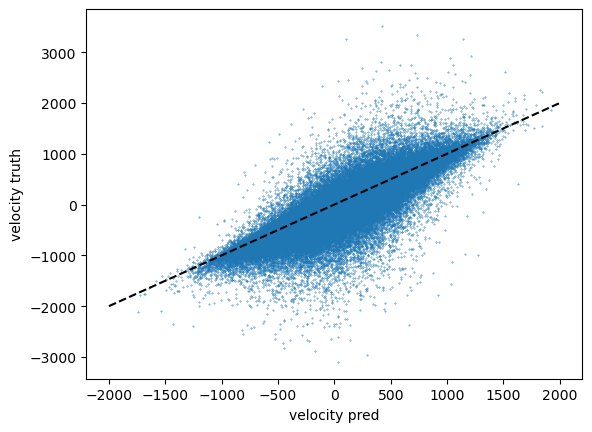

In [15]:
pl.figure()
pl.scatter(vel_query_interp[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.plot([-2000,2000], [-2000,2000], 'k--')
pl.xlabel('velocity pred')
pl.ylabel('velocity truth')


Text(0, 0.5, 'velocity truth')

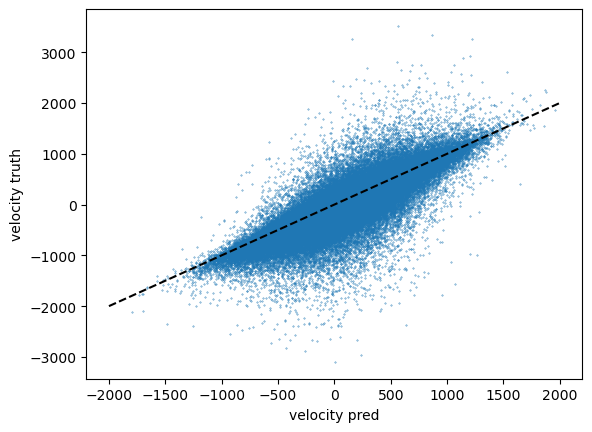

In [20]:
pl.figure()
pl.scatter(vel_query_interp_orig[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.plot([-2000,2000], [-2000,2000], 'k--')
pl.xlabel('velocity pred')
pl.ylabel('velocity truth')


Text(0, 0.5, 'velocity truth')

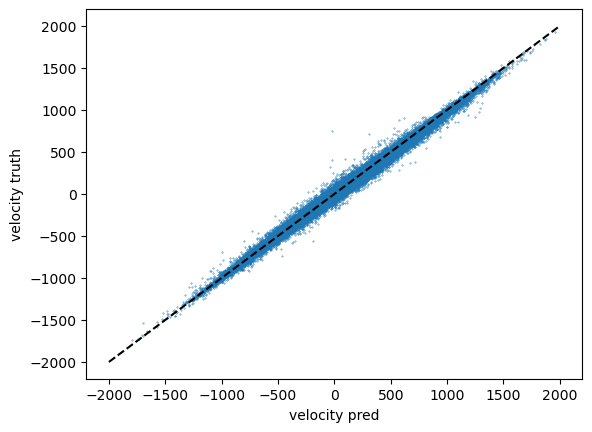

In [21]:
pl.figure()
pl.scatter(vel_query_interp_orig[:,0], vel_query_interp[:,0], s=0.1)
pl.plot([-2000,2000], [-2000,2000], 'k--')
pl.xlabel('velocity pred')
pl.ylabel('velocity truth')


In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(
        n_neighbors=5, leaf_size=1000,
        algorithm='ball_tree', weights='distance', n_jobs=-1)
knn.fit(ppos, pvel)



KNeighborsRegressor(algorithm='ball_tree', leaf_size=1000, n_jobs=-1,
                    weights='distance')

In [23]:
import pickle as pk
df_mock = pk.load(open('/mnt/home/spandey/ceph/ltu-cmass/cmass/bias/charm/testing_notebook' + '/pos_lgM_mock_LH_%d.pk'%test_LH_id, 'rb'))
hpos_mock, lgMass_mock = df_mock['pos_h_mock'], df_mock['lgMass_mock']




In [24]:
vmock_pred = knn.predict(hpos_mock)



In [25]:
vmock_pred_truepos = knn.predict(pos_h_truth_orig)



In [27]:
# vmock_pred_interp = np.vstack((interpvx(hpos_mock), interpvy(hpos_mock), interpvz(hpos_mock))).T

vmock_pred_interp = np.vstack((interpvx_orig(hpos_mock), interpvy_orig(hpos_mock), interpvz_orig(hpos_mock))).T


In [28]:
# pos_h_truth_orig
# hpos_mock
# interpvx(hpos_mock)
# vmock_pred_interp
indfinite_vmock = np.where(np.isfinite(vmock_pred_interp).all(axis=1))[0]

print(len(indfinite_vmock)/len(vmock_pred_interp))

inf_inf_nan_vmock = np.where(np.isfinite(vmock_pred_interp).all(axis=1) == False)[0]

vmock_pred_interp_allfinite = np.copy(vmock_pred_interp)
vmock_pred_interp_allfinite[inf_inf_nan_vmock] = vmock_pred[inf_inf_nan_vmock]



1.0


In [29]:
vmock_pred -= np.mean(vmock_pred, axis=0)


In [30]:
vmock_pred_truepos -= np.mean(vmock_pred_truepos, axis=0)



In [31]:
# vmock_pred_interp -= np.mean(vmock_pred_interp, axis=0)
vmock_pred_interp_allfinite -= np.mean(vmock_pred_interp_allfinite, axis=0)


In [32]:
# # vmock_pred_interp

# indfinite_vmock = np.where(np.isfinite(vmock_pred_interp).all(axis=1))[0]
# print(len(indfinite_vmock)/len(vmock_pred_interp))



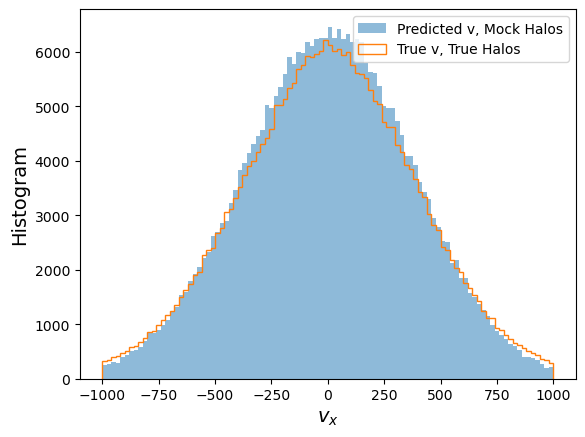

In [33]:
# vmock_pred.shape
pl.figure()
# _ = pl.hist(vmock_pred[:,0], bins=100, alpha=0.5, label='pred', range=(-1000,1000))
# _ = pl.hist(vel_h_truth_orig[:,0], bins=100, alpha=0.5, label='truth', histtype='step', range=(-1000,1000))

# _ = pl.hist(vmock_pred[:,1], bins=100, alpha=0.5, label='pred', range=(-1000,1000))
# _ = pl.hist(vmock_pred_interp[:,1], bins=100, alpha=0.5, label='pred', range=(-1000,1000))
_ = pl.hist(vmock_pred_interp_allfinite[:,1], bins=100, alpha=0.5,  range=(-1000,1000), label='Predicted v, Mock Halos')
_ = pl.hist(vel_h_truth_orig[:,1], bins=100, alpha=1.0, histtype='step', range=(-1000,1000), label='True v, True Halos')
pl.xlabel(r'$v_x$', size=14)
pl.ylabel('Histogram', size=14)
pl.legend()



Text(0, 0.5, 'velocity truth')

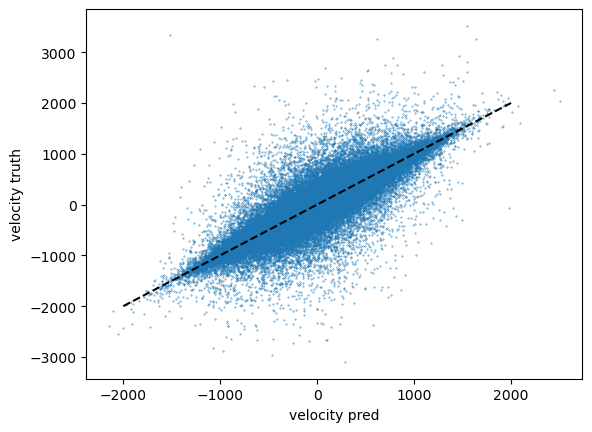

In [21]:
pl.figure()
# pl.scatter(vmock_pred_truepos[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.scatter(vmock_pred_truepos[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.plot([-2000,2000], [-2000,2000], 'k--')
pl.xlabel('velocity pred')
pl.ylabel('velocity truth')


Text(0, 0.5, 'velocity truth')

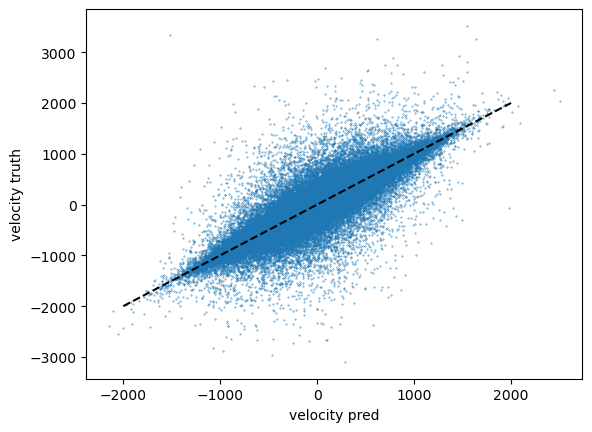

In [34]:
pl.figure()
# pl.scatter(vmock_pred_truepos[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.scatter(vmock_pred_truepos[:,0], vel_h_truth_orig[:,0], s=0.1)
pl.plot([-2000,2000], [-2000,2000], 'k--')
pl.xlabel('velocity pred')
pl.ylabel('velocity truth')



In [35]:
redshift = 0.5
LH_cosmo_val_file='/mnt/home/spandey/ceph/Quijote/latin_hypercube_params.txt'
LH_cosmo_val_all = np.loadtxt(LH_cosmo_val_file)
from colossus.cosmology import cosmology
cosmo_LH = LH_cosmo_val_all[test_LH_id]
params_LH = {'flat': True, 'H0': 100*cosmo_LH[2], 'Om0': cosmo_LH[0], 'Ob0': cosmo_LH[1], 'sigma8': cosmo_LH[4], 'ns': cosmo_LH[3]}
cosmo_LH = cosmology.setCosmology('myCosmo', **params_LH)

import redshift_space_library as RSL
# hpos_mock_z = np.copy(hpos_mock).astype(np.float32)
# vmock_pred = np.copy(vmock_pred).astype(np.float32)

hpos_mock_z = np.ascontiguousarray(hpos_mock, dtype=np.float32)
vmock_pred = np.ascontiguousarray(vmock_pred, dtype=np.float32)

RSL.pos_redshift_space(hpos_mock_z, vmock_pred, BoxSize, cosmo_LH.Hz(redshift), 0.5, axis=0)



In [36]:
import redshift_space_library as RSL
hpos_mock_z2 = np.ascontiguousarray(hpos_mock, dtype=np.float32)
# vmock_pred2 = np.ascontiguousarray(vmock_pred_interp, dtype=np.float32)
vmock_pred2 = np.ascontiguousarray(vmock_pred_interp_allfinite, dtype=np.float32)

RSL.pos_redshift_space(hpos_mock_z2, vmock_pred2, BoxSize, cosmo_LH.Hz(redshift), 0.5, axis=0)



In [37]:
hpos_truth_z = np.ascontiguousarray(pos_h_truth_orig, dtype=np.float32)
vel_h_truth_z = np.ascontiguousarray(vel_h_truth_orig, dtype=np.float32)

RSL.pos_redshift_space(hpos_truth_z, vel_h_truth_z, BoxSize, cosmo_LH.Hz(redshift), 0.5, axis=0)



In [38]:
import Pk_library as PKL
import MAS_library as MASL
grid = 128
# MAS = 'NGP'
MAS = 'NGP'
Mmin_Pk, Mmax_Pk = 13.0, 16.0
indsel_Pk_truth = np.where((lgmass_truth_orig > Mmin_Pk) & (lgmass_truth_orig < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ', number in truth:,', len(indsel_Pk_truth))
shot_noise_truth2 = BoxSize**3/len(indsel_Pk_truth)
mesh_truth2 = np.zeros((grid, grid, grid), dtype=np.float32)
pos_truth2 = (pos_h_truth_orig[indsel_Pk_truth,...]).astype(np.float32)
MASL.MA(pos_truth2, mesh_truth2, BoxSize, MAS)
mesh_truth2 /= np.mean(mesh_truth2, dtype=np.float32);  mesh_truth2 -= 1.0
# Pk_truth2_realspace = PKL.Pk(mesh_truth2, BoxSize, axis=0, MAS=None, threads=1)
Pk_truth2_realspace = PKL.Pk(mesh_truth2, BoxSize, axis=0, MAS=MAS, threads=1)


# Mmin_Pk, Mmax_Pk = Mmin_Pk_all[j], Mmax_Pk_all[j]
indsel_Pk_mock = np.where((lgMass_mock > Mmin_Pk) & (lgMass_mock < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ' number in mock:,', len(indsel_Pk_mock))        
mesh_mock = np.zeros((grid, grid, grid), dtype=np.float32)
pos_mock = (hpos_mock[indsel_Pk_mock,...]).astype(np.float32)
MASL.MA(pos_mock, mesh_mock, BoxSize, MAS)
mesh_mock /= np.mean(mesh_mock, dtype=np.float32);  mesh_mock -= 1.0
# Pk_mock_realspace = PKL.Pk(mesh_mock, BoxSize, axis=0, MAS=None, threads=1)  
Pk_mock_realspace = PKL.Pk(mesh_mock, BoxSize, axis=0, MAS=MAS, threads=1)  




13.0 16.0 , number in truth:, 295475

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.09 seconds
13.0 16.0  number in mock:, 301743

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.09 seconds


In [39]:
import Pk_library as PKL
import MAS_library as MASL
grid = 128
MAS = 'NGP'
Mmin_Pk, Mmax_Pk = 13.0, 16.0
indsel_Pk_truth = np.where((lgmass_truth_orig > Mmin_Pk) & (lgmass_truth_orig < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ', number in truth:,', len(indsel_Pk_truth))
shot_noise_truth2 = BoxSize**3/len(indsel_Pk_truth)
mesh_truth2 = np.zeros((grid, grid, grid), dtype=np.float32)
pos_truth2 = (hpos_truth_z[indsel_Pk_truth,...]).astype(np.float32)
MASL.MA(pos_truth2, mesh_truth2, BoxSize, MAS)
mesh_truth2 /= np.mean(mesh_truth2, dtype=np.float32);  mesh_truth2 -= 1.0
# Pk_truth2 = PKL.Pk(mesh_truth2, BoxSize, axis=0, MAS=None, threads=1)
Pk_truth2 = PKL.Pk(mesh_truth2, BoxSize, axis=0, MAS=MAS, threads=1)


# Mmin_Pk, Mmax_Pk = Mmin_Pk_all[j], Mmax_Pk_all[j]
indsel_Pk_mock = np.where((lgMass_mock > Mmin_Pk) & (lgMass_mock < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ' number in mock:,', len(indsel_Pk_mock))        
mesh_mock = np.zeros((grid, grid, grid), dtype=np.float32)
pos_mock = (hpos_mock_z[indsel_Pk_mock,...]).astype(np.float32)
MASL.MA(pos_mock, mesh_mock, BoxSize, MAS)
mesh_mock /= np.mean(mesh_mock, dtype=np.float32);  mesh_mock -= 1.0
# Pk_mock = PKL.Pk(mesh_mock, BoxSize, axis=0, MAS=None, threads=1)  
Pk_mock = PKL.Pk(mesh_mock, BoxSize, axis=0, MAS=MAS, threads=1)  

indsel_Pk_mock = np.where((lgMass_mock > Mmin_Pk) & (lgMass_mock < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ' number in mock:,', len(indsel_Pk_mock))        
mesh_mock2 = np.zeros((grid, grid, grid), dtype=np.float32)
pos_mock2 = (hpos_mock_z2[indsel_Pk_mock,...]).astype(np.float32)
MASL.MA(pos_mock2, mesh_mock2, BoxSize, MAS)
mesh_mock2 /= np.mean(mesh_mock2, dtype=np.float32);  mesh_mock2 -= 1.0
# Pk_mock2 = PKL.Pk(mesh_mock2, BoxSize, axis=0, MAS=None, threads=1)  
Pk_mock2 = PKL.Pk(mesh_mock2, BoxSize, axis=0, MAS=MAS, threads=1)  




13.0 16.0 , number in truth:, 295475

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.09 seconds
13.0 16.0  number in mock:, 301743

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.09 seconds
13.0 16.0  number in mock:, 301743

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.09 seconds


Text(0.5, 1.0, 'Real space; NGP deconvolved')

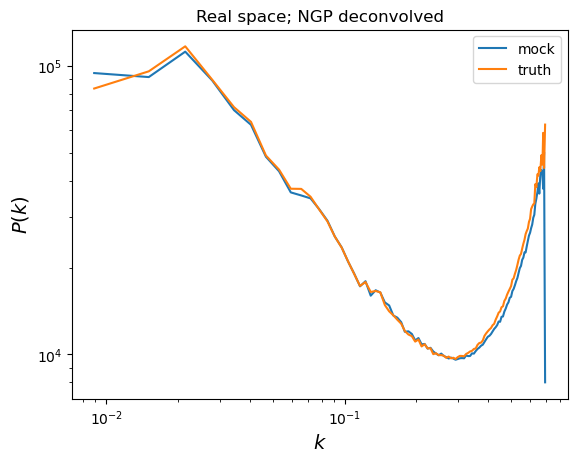

In [40]:
pl.figure()
pl.plot(Pk_mock.k3D, Pk_mock_realspace.Pk[:,0], label='mock')
pl.plot(Pk_truth2.k3D, Pk_truth2_realspace.Pk[:,0], label='truth')

pl.loglog()
# pl.loglog()
pl.legend()
pl.ylabel(r'$P(k)$', size=14)
pl.xlabel(r'$k$', size=14)
pl.title(r'Real space; NGP deconvolved')



Text(0.5, 1.0, 'Monopole; NGP deconvolved')

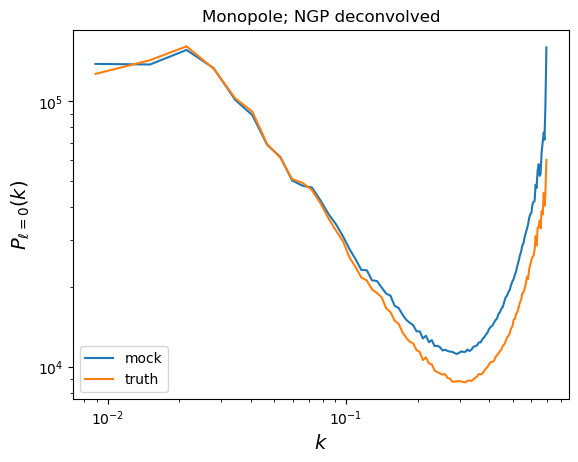

In [41]:
pl.figure()
# pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,0], label='mock')
pl.plot(Pk_mock2.k3D, Pk_mock2.Pk[:,0], label='mock', ls='-')
pl.plot(Pk_truth2.k3D, Pk_truth2.Pk[:,0], label='truth')
# pl.plot(Pk_mock2.k3D, Pk_mock2.Pk[:,0], label='mock2', ls='--')
pl.loglog()
pl.legend()
pl.ylabel(r'$P_{\ell = 0}(k)$', size=14)
pl.xlabel(r'$k$', size=14)
pl.title(r'Monopole; NGP deconvolved')



Text(0.5, 1.0, 'Quadropole; NGP deconvolved')

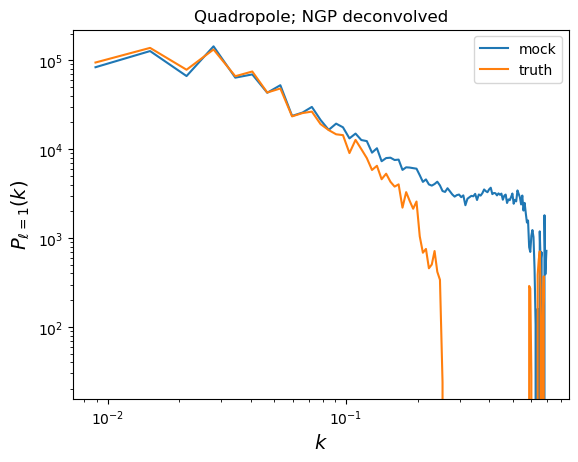

In [42]:
pl.figure()
pl.plot(Pk_mock.k3D, Pk_mock2.Pk[:,1], label='mock', ls='-')
pl.plot(Pk_truth2.k3D, Pk_truth2.Pk[:,1], label='truth')
# pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,1], label='mock')
# pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,1], label='mock')
# pl.plot(Pk_mock.k3D, Pk_mock2.Pk[:,1], label='mock2', ls='--')
pl.loglog()
pl.legend()
pl.ylabel(r'$P_{\ell = 1}(k)$', size=14)
pl.xlabel(r'$k$', size=14)
pl.title(r'Quadropole; NGP deconvolved')



Text(0.5, 1.0, 'Hexadecapole; NGP deconvolved')

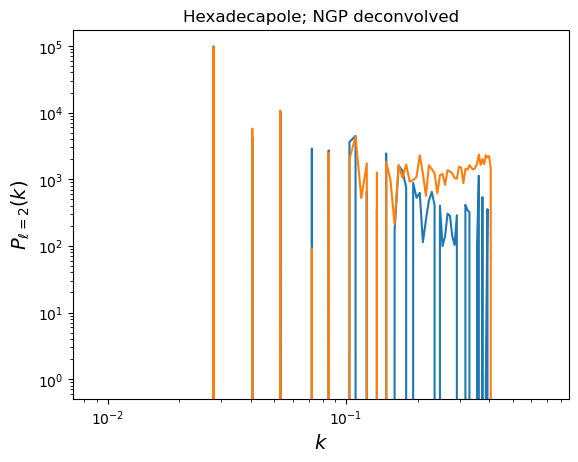

In [43]:
pl.figure()
pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,2], label='mock')
pl.plot(Pk_truth2.k3D, Pk_truth2.Pk[:,2], label='truth')

pl.loglog()
pl.ylabel(r'$P_{\ell = 2}(k)$', size=14)
pl.xlabel(r'$k$', size=14)
pl.title(r'Hexadecapole; NGP deconvolved')



In [44]:
import Pk_library as PKL
import MAS_library as MASL
grid = 128
MAS = 'CIC'
Mmin_Pk, Mmax_Pk = 13.0, 16.0
indsel_Pk_truth = np.where((lgmass_truth_orig > Mmin_Pk) & (lgmass_truth_orig < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ', number in truth:,', len(indsel_Pk_truth))
shot_noise_truth2 = BoxSize**3/len(indsel_Pk_truth)
mesh_truth2 = np.zeros((grid, grid, grid), dtype=np.float32)
pos_truth2 = (hpos_truth_z[indsel_Pk_truth,...]).astype(np.float32)
MASL.MA(pos_truth2, mesh_truth2, BoxSize, MAS)
mesh_truth2 /= np.mean(mesh_truth2, dtype=np.float32);  mesh_truth2 -= 1.0
Pk_truth2 = PKL.Pk(mesh_truth2, BoxSize, axis=0, MAS=None, threads=1)


# Mmin_Pk, Mmax_Pk = Mmin_Pk_all[j], Mmax_Pk_all[j]
indsel_Pk_mock = np.where((lgMass_mock > Mmin_Pk) & (lgMass_mock < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ' number in mock:,', len(indsel_Pk_mock))        
mesh_mock = np.zeros((grid, grid, grid), dtype=np.float32)
pos_mock = (hpos_mock_z[indsel_Pk_mock,...]).astype(np.float32)
MASL.MA(pos_mock, mesh_mock, BoxSize, MAS)
mesh_mock /= np.mean(mesh_mock, dtype=np.float32);  mesh_mock -= 1.0
Pk_mock = PKL.Pk(mesh_mock, BoxSize, axis=0, MAS=None, threads=1)  

indsel_Pk_mock = np.where((lgMass_mock > Mmin_Pk) & (lgMass_mock < Mmax_Pk))[0]
print(Mmin_Pk, Mmax_Pk, ' number in mock:,', len(indsel_Pk_mock))        
mesh_mock2 = np.zeros((grid, grid, grid), dtype=np.float32)
pos_mock2 = (hpos_mock_z2[indsel_Pk_mock,...]).astype(np.float32)
MASL.MA(pos_mock2, mesh_mock2, BoxSize, MAS)
mesh_mock2 /= np.mean(mesh_mock2, dtype=np.float32);  mesh_mock2 -= 1.0
Pk_mock2 = PKL.Pk(mesh_mock2, BoxSize, axis=0, MAS=None, threads=1)  




13.0 16.0 , number in truth:, 295475

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.08 seconds
13.0 16.0  number in mock:, 301743

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.08 seconds
13.0 16.0  number in mock:, 301743

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.08 seconds


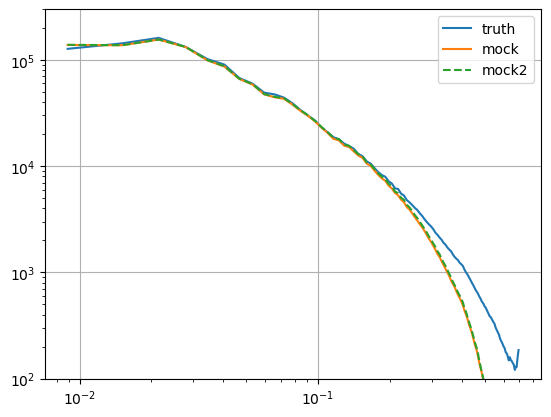

In [45]:
pl.figure()
pl.plot(Pk_truth2.k3D, Pk_truth2.Pk[:,0], label='truth')
pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,0], label='mock')
pl.plot(Pk_mock2.k3D, Pk_mock2.Pk[:,0], label='mock2', ls='--')
pl.loglog()
pl.legend()
pl.ylim(1e2, 3e5)
pl.grid()


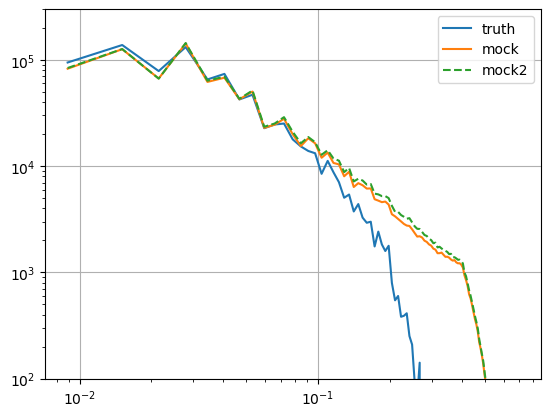

In [46]:
pl.figure()
pl.plot(Pk_truth2.k3D, Pk_truth2.Pk[:,1], label='truth')
pl.plot(Pk_mock.k3D, Pk_mock.Pk[:,1], label='mock')
pl.plot(Pk_mock2.k3D, Pk_mock2.Pk[:,1], label='mock2', ls='--')
pl.loglog()
pl.legend()
pl.ylim(1e2, 3e5)
pl.grid()


